# Preprocessing Phase II

In order to run this notebook successfully you need the unzipped [Kaggle dataset](https://www.kaggle.com/xainano/handwrittenmathsymbols) for symbols images. If it is unzipped, it should be called 'data.rar'.

##Math Symbols Dataset Preprocessing

If it is your first time running this code, and all you have is the handwrittenmathsymbols.zip, then you need to comment out the second cell and then run all the cells under this header. If you already have the extracted_images.zip, you only need to run the first two cells and the last one.

In [0]:
# Import all necessary packages for the math symbols dataset
from zipfile import ZipFile
from sklearn.datasets import load_files
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import imageio
import glob
import math

In [0]:
# Install necessary packages
!pip install patool
!pip install pyunpack
import patoolib

In [0]:
with ZipFile("handwrittenmathsymbols.zip", "r") as zipObj:
  zipObj.extractall()

In [0]:
from pyunpack import Archive
Archive('handwrittenmathsymbols.zip').extractall('/')

import patoolib
patoolib.extract_archive("data.rar")

In [0]:
!pip install unrar

In [0]:
# brew install unrar

In [0]:
!pip install rarfile

In [0]:
# This will take some time
from rarfile import RarFile

with RarFile("data.rar") as rf:
    for f in rf.infolist():
        with open(f.filename, "wb") as of:
            of.write(rf.read(f))
            
# This cell will finish running with "[Errno 21] Is a directory: 'extracted_images/!"
# Continue running the remaining cells

In [0]:
import os

# Deleting duplicates from file
def deletefromfolder(path):
    datadir = path
    print('Directory:', datadir)

    rmmap = dict()
    total = 0
    repeatcnt = 0
    for root, directories, filenames in os.walk(datadir):
        
        for filename in filenames:
            total += 1
            if filename.endswith('.jpg') and not filename.startswith('._'):
                filei = os.path.join(root, filename)
                imi = imageio.imread(filei)
                npi = np.asarray(imi).reshape(1, -1).reshape((2025, ))
                idf = npi.tolist()
                for i in range(len(idf)):
                    idf[i] = str(idf[i])
                strlist = ''.join(idf)

                if strlist in rmmap.keys():
                    repeatcnt += 1
                    rmmap[strlist].append(filename)
                else:
                    rmmap[strlist] = list()

    print('Repeat/Total: {}/{}'.format(repeatcnt, total))
    for key in rmmap:
        for item in rmmap[key]:
            os.remove(os.path.join(datadir, item))

if __name__ == '__main__':
    images_path = './extracted_images/'
    dirlist = os.listdir(images_path)
    for item in dirlist:
        deletefromfolder(os.path.join(images_path,item))

##Math Symbols Dataframe

You should now see a folder called extracted_images in your files. This section of the colab will take that folder and create a dataframe from its subfolders. Each row in the dataframe will be an image, its corresponding label will be in the "Target" column.

In [29]:
# Import all necessary packages
from keras.preprocessing.image import img_to_array
from PIL import Image, ImageOps
import glob
import re

Using TensorFlow backend.


In [0]:
# Function that creates dictionary with keys and values as arrays of pixel values
def list_files(dir):                                                                                                  
    r = {}                                                                                                            
    subdirs = [x[0] for x in os.walk(dir)]
    for subdir in subdirs:
      symbols_sub = [Image.open(file) for file in glob.glob("{}/*.jpg".format(subdir))]
      r['{}'.format(subdir)] = symbols_sub 
    return r

In [0]:
# Returns resized image
def resize(img, size):
  return img.resize(size, Image.ANTIALIAS)

In [0]:
# create dictionary with keys and values as arrays of pixel values
pixels_d = list_files("./extracted_images")

In [33]:
# Getting all folder names
for value in pixels_d.keys():
  print(value)

./extracted_images
./extracted_images/lambda
./extracted_images/exists
./extracted_images/{
./extracted_images/)
./extracted_images/1
./extracted_images/T
./extracted_images/sum
./extracted_images/R
./extracted_images/q
./extracted_images/y
./extracted_images/,
./extracted_images/f
./extracted_images/theta
./extracted_images/cos
./extracted_images/lt
./extracted_images/i
./extracted_images/Delta
./extracted_images/gamma
./extracted_images/v
./extracted_images/0
./extracted_images/forall
./extracted_images/}
./extracted_images/3
./extracted_images/!
./extracted_images/b
./extracted_images/neq
./extracted_images/sqrt
./extracted_images/prime
./extracted_images/=
./extracted_images/H
./extracted_images/e
./extracted_images/[
./extracted_images/A
./extracted_images/rightarrow
./extracted_images/ldots
./extracted_images/ascii_124
./extracted_images/u
./extracted_images/leq
./extracted_images/8
./extracted_images/+
./extracted_images/p
./extracted_images/-
./extracted_images/beta
./extracted

In [0]:
# Make sure we are actually getting what we want in cell below
for key, value in pixels_d.items():
  print((re.split('/', key)))

Make sure that in the first if-statement in the nested for loop, the name after the forward slash matches the first subfolder in 'extracted-images'.

In [0]:
# Loop will create a df with all pictures as
# rows and columns are the pixels

#new = []

for key, value in pixels_d.items():
  # skip the first folder, because its empty
  if key == "./extracted_images":
    continue
  else:
    # resize every image and turn it into an array
    size=(28,28)
    value = [resize(img, size=size) for img in value]
    value = [img_to_array(img) for img in value]
    #new.append(value)
    for i in range(len(value)):
      value[i] = value[i].ravel()
      
    # For first folder, create the big dataframe
    # Ensure that the path for the following line matches the first subfolder in
    # extracted images which can be found in the previous cell's output
    if key == "./extracted_images/lambda":
      big2_df = pd.DataFrame(value)
      big2_df /= 255.0
      for i in big2_df.columns:
        big2_df = big2_df.rename(columns={i: str(i)})
      big2_df['Target'] = (re.split('/', key))[2]
    # For every other folder, concatenate that df to
    # the big df
    else:
      value_df = pd.DataFrame(value)
      value_df /= 255.0
      for i in value_df.columns:
        value_df = value_df.rename(columns={i: str(i)})
      value_df['Target'] = (re.split('/', key))[2]
      big2_df = pd.concat([big2_df, value_df], axis=0, sort=False)

We will now save big2_df as a csv so that we don't have to run these preprocessing steps again.

In [0]:
# Saves clean big2_df as a csv
big2_df.to_csv('big_df.csv', index=False)

The following two cells are for visualizing an image from big2_df. We need to create a copy of the dataframe without the target value so that we can reshape the row of pixels into an image. We do that in the first cell. The second cell chooses an image to view (in this case, image 40000) and plots it.

In [38]:
# store target column
target = big2_df['Target']

# Create new df without target column
new23_df = big2_df.drop(columns='Target')
new23_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,0.850980,0.423529,0.647059,1.000000,0.980392,0.996078,0.996078,1.000000,0.996078,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.992157,1.000000,0.839216,0.521569,0.639216,1.000000,0.984314,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.0,0.937255,0.376471,1.000000,0.988235,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996078,0.988235,0.984314,0.870588,0.152941,0.388235,0.427451,0.545098,0.976471,1.000000,0.988235,0.996078,0.996078,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.988235,0.996078,0.909804,0.725490,1.000000,1.000000,0.678431,0.372549,0.662745,1.000000,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.996078,1.000000,0.396078,0.996078,1.000000,0.996078,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988235,0.980392,1.000000
2,1.000000,1.000000,1.000000,1.000000,0.992157,1.000000,0.752941,0.501961,1.000000,0.976471,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,0.992157,1.000000,0.752941,0.505882,1.000000,0.976471,1.000000,1.000000,...,0.996078,0.992157,0.992157,0.800000,0.490196,0.811765,0.858824,0.952941,0.996078,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,0.996078,0.996078,1.000000,0.984314,1.000000,0.772549,0.074510,0.505882,0.929412,0.992157,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.000000,1.000000,0.992157,1.000000,0.807843,0.380392,0.388235,0.388235,0.368627,0.776471,1.0,0.992157,0.996078,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.992157,0.988235,0.827451,0.494118,0.964706,...,1.000000,1.000000,1.000000,0.996078,0.992157,0.988235,0.980392,0.690196,0.400000,0.423529,0.94902,0.980392,0.984314,0.662745,0.447059,0.482353,0.839216,1.000000,1.0,0.976471,0.996078,0.996078,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,1.000000,0.639216,0.780392,1.000000,0.988235
4,1.000000,0.996078,0.984314,1.000000,0.600000,0.388235,0.380392,0.819608,1.000000,0.992157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,0.976471,0.396078,0.890196,0.992157,0.996078,1.000000,...,0.972549,1.000000,0.666667,0.376471,0.678431,0.800000,0.827451,0.760784,1.000000,0.992157,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,1.0,1.000000,1.000000,0.996078,1.000000,1.0,1.0,1.0,1.0,0.996078,0.996078,0.988235,1.000000,0.976471,0.549020,0.501961,0.443137,0.666667,0.988235,0.992157,1.000000,1.000000


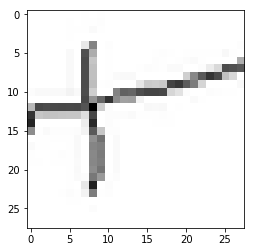

In [39]:
# Plot series to make sure it is an image
image_to_view = 40000

plt.imshow(
 new23_df.iloc[image_to_view][new23_df.columns.values].values.reshape(28,28), cmap='gray')
plt.show()